In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

import warnings; warnings.simplefilter('ignore')

### 유저 평점 가져오기

In [ ]:
# surprise 라이브러리의 Reader
reader = Reader()

In [ ]:
ratings = pd.read_csv('C:/ESWork/ESPython/final_project/data/MovieLens_data/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId','rating']], reader)
# data.split(n_folds=5)

trainset = data.build_full_trainset()
testset = trainset.build_testset()

In [ ]:
svd = SVD()
# evaluate(svd, data, measures=['RMSE', 'MAE'])

####### 기존 커널대로 진행하면 오류나서 수정 #######
svd.fit(trainset)
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.6431


0.6430853615122868

In [ ]:
ratings.userId.value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: userId, Length: 671, dtype: int64

In [ ]:
ratings[ratings['userId'] == 547]

,userId,movieId,rating,timestamp
78433,547,1,3.5,1053173138
78434,547,6,2.5,1149462857
78435,547,7,2.0,1021098817
78436,547,11,3.0,1418149949
78437,547,14,3.5,1053171195
...,...,...,...,...
80819,547,157296,3.0,1466948434
80820,547,160656,3.5,1471168466
80821,547,160718,4.0,1469713151
80822,547,161084,2.5,1468248331


In [ ]:
svd.predict(1, 302, 3)
# uid : 유저 아이디, iid : 아이템 아이디(영화 아이디), r_ui : 실제 평점, est : 예측 평점

Prediction(uid=1, iid=302, r_ui=3, est=2.6860771564659602, details={'was_impossible': False})

In [ ]:
# Predict 메서드는 개별 사용자와 개별 영화에 대한 추천 평점을 반환함

In [ ]:
# surprise는 파일을 읽을때 컬럼명(헤더)가 있으면 안됨
# 그래서 헤더와 인덱스가 없는 csv파일을 ratings_noh.csv로 생성한것
# 순서는 usrID, movieID, rating, timestamp임

In [ ]:
user_1 = ratings[ratings['userId'] == 1]
user_1

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


### 대쉬보드 만들기

In [ ]:
ratings = pd.read_csv('C:/ESWork/ESPython/final_project/data/MovieLens_data/ratings_small.csv')
md = pd.read_csv('C:/ESWork/ESPython/final_project/data/MovieLens_data/movies_metadata.csv')
links_small = pd.read_csv('C:/ESWork/ESPython/final_project/data/MovieLens_data/links_small.csv')
credits = pd.read_csv('C:/ESWork/ESPython/final_project/data/MovieLens_data/credits.csv')
keywords = pd.read_csv('C:/ESWork/ESPython/final_project/data/MovieLens_data/keywords.csv')

links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
md = md.drop([19730, 29503, 35587])

In [ ]:
md.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [ ]:
md['id'] = md['id'].astype('int')
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')

In [ ]:
md = md.merge(credits, on='id')
md = md.merge(keywords, on='id')
md.shape

(46628, 27)

In [ ]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9219, 27)

In [ ]:
smd.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
md['cast'] = md['cast'].apply(literal_eval) 
md['crew'] = md['crew'].apply(literal_eval)
md['keywords'] = md['keywords'].apply(literal_eval)
md['cast_size'] = md['cast'].apply(lambda x: len(x))
md['crew_size'] = md['crew'].apply(lambda x: len(x))

md['director'] = md['crew'].apply(get_director)

md['cast'] = md['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
md['cast'] = md['cast'].apply(lambda x: x[:3] if len(x) >= 3 else x)

md['cast'] = md['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

md['director'] = md['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
md['director'] = md['director'].apply(lambda x: [x])

md['genres'] = md['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

md['production_countries'] = md['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

md.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,cast,crew,keywords,cast_size,crew_size,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,"[tomhanks, timallen, donrickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",13,106,[johnlasseter]
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Jumanji,False,6.9,2413.0,"[robinwilliams, jonathanhyde, kirstendunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",26,16,[joejohnston]
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Grumpier Old Men,False,6.5,92.0,"[waltermatthau, jacklemmon, ann-margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",7,4,[howarddeutch]


In [ ]:
ratings.userId.value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: userId, Length: 671, dtype: int64

In [ ]:
len(ratings.userId.value_counts())

671

In [ ]:
same_df =pd.DataFrame(columns=['userId', 'first', 'second','same_mv_ratio'])
same_df

,userId,first,second,same_mv_ratio


In [ ]:
def merge_ratings_mvinfo(df1, df2):  
    num = len(df1.userId.value_counts())
    for i in range(0, num):
        k = i+1
        user_k = df1[df1['userId'] == k]
        first = len(user_k)
        user_k = user_k.merge(df2, left_on='movieId', right_on='movieId')
        second = len(user_k)
        ratio = (second/first)*100
        same_df.loc[i]=[k,first, second,ratio]
#         same_df.append({'userId':i, 'same_mv_ratio':ratio}, ignore_index=True) ->> 안됨

In [ ]:
def merge_df(k, df):
    user_k = ratings[ratings['userId'] == k]
    user_k = user_k.merge(df, left_on='movieId', right_on='movieId')
    user_k = user_k[['userId','movieId','naver_code','rating','title_eng','genres','director','cast','nation']]
    user_k.to_csv(f'C:/ESWork/ESPython/final_project/data/user_movie/user_{k}_movies.csv', index=False)

In [ ]:
movie_df = pd.read_csv('C:/ESWork/ESPython/final_project/data/naver_data/movie_dataset.csv')
movie_df.head(3)

,movieId,naver_code,title_eng,title_kor,genres,director,cast,directors_kor,cast_kor,naver_user_rate,naver_user_participate,naver_critics_rate,naver_critics_participate,nation,release_date,running_time,age,story,poster_url,url
0,1,17153,Toy Story,토이 스토리,Adventure Animation Children Comedy Fantasy,John Lasseter,"Tom Hanks,Tim Allen,Don Rickles",존 라세터,"톰 행크스, 팀 알렌",9.32,1393,0.0,0,미국,2010.05.05 1995.12.30,77분,"전체 관람가, G",우디(톰 행크스 목소리 분)는 6살짜리 남자 아이 앤디가 가장 아끼는 카우보이 인형...,https://movie-phinf.pstatic.net/20111222_26/13...,https://movie.naver.com/movie/bi/mi/basic.nave...
1,2,17440,Jumanji,쥬만지,Adventure Children Fantasy,Joe Johnston,"Robin Williams,Jonathan Hyde,Kirsten Dunst",조 존스톤,"로빈 윌리엄스, 커스틴 던스트, 데이빗 알란 그리어",9.22,1591,0.0,0,미국,1996.01.20,104분,"전체 관람가, PG",1969년. 커다란 공장을 운영하는 아버지를 둔 12세 소년 알랜 패리쉬(Young...,https://movie-phinf.pstatic.net/20111223_209/1...,https://movie.naver.com/movie/bi/mi/basic.nave...
2,4,17798,Waiting To Exhale,사랑을 기다리며,Comedy Drama Romance,Forest Whitaker,"Whitney Houston,Angela Bassett,Loretta Devine",포레스트 휘태커,"휘트니 휴스턴, 안젤라 바셋, 로레타 드바인",8.59,17,0.0,0,미국,1996.04.05,127분,"청소년 관람불가, R",사반나 잭슨(Savannah Jackson: 휘트니 휴스턴 분)은 TV 프로듀서로서...,https://movie-phinf.pstatic.net/20111221_192/1...,https://movie.naver.com/movie/bi/mi/basic.nave...


In [ ]:
movie_df.shape

(3716, 20)

In [ ]:
merge_ratings_mvinfo(ratings, movie_df)
same_df = same_df.astype({'userId':'int', 'first':'int', 'second':'int'})
same_df

,userId,first,second,same_mv_ratio
0,1,20,5,25.000000
1,2,76,39,51.315789
2,3,51,30,58.823529
3,4,204,39,19.117647
4,5,100,59,59.000000
...,...,...,...,...
666,667,68,36,52.941176
667,668,20,5,25.000000
668,669,37,17,45.945946
669,670,31,18,58.064516


In [ ]:
import numpy as np

same_df.sort_values(by='second', ascending=False).head(30)

print(same_df.second.mean(), same_df.second.median())
same_df.sort_values(by='second', ascending=False).head(335)

59.41430700447094 31.0


,userId,first,second,same_mv_ratio
14,15,1700,714,42.000000
623,624,1735,681,39.250720
72,73,1610,671,41.677019
546,547,2391,562,23.504810
212,213,910,520,57.142857
...,...,...,...,...
618,619,43,32,74.418605
382,383,62,32,51.612903
523,524,64,32,50.000000
616,617,75,32,42.666667


In [ ]:
ratings.loc[ratings.userId == 64].value_counts('rating')

rating
4.0    8
5.0    7
3.0    5
2.0    1
dtype: int64

In [ ]:
same_df[same_df.second <17].sort_values(by='second', ascending=False).head(30)

,userId,first,second,same_mv_ratio
52,53,46,16,34.782609
48,49,99,16,16.161616
620,621,95,16,16.842105
141,142,61,16,26.229508
161,162,30,16,53.333333
86,87,31,16,51.612903
79,80,37,16,43.243243
180,181,27,16,59.259259
63,64,21,16,76.190476
605,606,60,16,26.666667


In [ ]:
print(same_df.sort_values(by='second', ascending=False).quantile(0.25), same_df.sort_values(by='second', ascending=False).quantile(0.50),
      same_df.sort_values(by='second', ascending=False).quantile(0.75))



userId           168.500000
first             37.000000
second            16.000000
same_mv_ratio     32.560068
Name: 0.25, dtype: float64 userId           336.000000
first             71.000000
second            31.000000
same_mv_ratio     43.975904
Name: 0.5, dtype: float64 userId           503.500000
first            161.000000
second            67.000000
same_mv_ratio     54.769753
Name: 0.75, dtype: float64


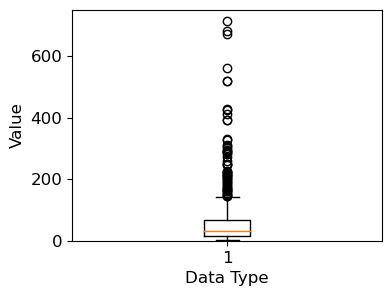

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
np.random.seed(0)


# 3. 그래프 그리기
fig, ax = plt.subplots()

ax.boxplot([same_df.second])
ax.set_ylim(0, 750)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

In [ ]:
same_df.sort_values(by='same_mv_ratio', ascending=False).head(20)

,userId,first,second,same_mv_ratio
512,513,22,19,86.363636
516,517,42,35,83.333333
31,32,48,39,81.250000
126,127,21,17,80.952381
414,415,26,21,80.769231
388,389,51,41,80.392157
463,464,30,24,80.000000
374,375,25,20,80.000000
661,662,58,46,79.310345
46,47,38,30,78.947368


In [ ]:
merge_df(64, movie_df)

In [ ]:
merge_df(288, movie_df)

In [ ]:
merge_df(475, movie_df)

In [ ]:
merge_df(213, movie_df)

In [ ]:
# merge_ratings_mvinfo(ratings)
# same_df = same_df.astype({'userId':'int', 'first':'int', 'second':'int'})
# same_df.loc[same_df['second']>300].sort_values(by='second', ascending=False).head(30)

TypeError: merge_ratings_mvinfo() missing 1 required positional argument: 'df2'

In [ ]:
same_df.loc[same_df['second']>300].sort_values(by='same_mv_ratio', ascending=False).head(30)

In [ ]:
same_df.sort_values(by='same_mv_ratio', ascending=False).head(20)

In [ ]:
user_1 = ratings[ratings['userId'] == 1]
user_1

In [ ]:
user_1 = user_1.merge(smd, left_on='movieId', right_on='id')
user_1

In [ ]:
smd.shape

In [ ]:
user_1 = ratings[ratings['userId'] == 1]
user_1

In [ ]:
user_1 = user_1.merge(md, left_on='movieId', right_on='id')
user_1


In [ ]:
md.info()

In [ ]:
md= md[['title','genres','cast','production_countries']]
md.info()

### 되출된 사용자 평점정보&영화정보 불러와 계산하기

In [ ]:
user_213 = pd.read_csv('C:/ESWork/ESPython/final_project/data/user_movie/user_213_movies.csv')
user_213.head(3)

,userId,movieId,naver_code,rating,title_eng,genres,director,cast,nation
0,213,1,17153,3.0,Toy Story,Adventure Animation Children Comedy Fantasy,John Lasseter,"Tom Hanks,Tim Allen,Don Rickles",미국
1,213,2,17440,3.0,Jumanji,Adventure Children Fantasy,Joe Johnston,"Robin Williams,Jonathan Hyde,Kirsten Dunst",미국
2,213,7,17447,2.0,Sabrina,Comedy Romance,Sydney Pollack,"Harrison Ford,Julia Ormond,Greg Kinnear",미국


In [ ]:
user_213.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      520 non-null    int64  
 1   movieId     520 non-null    int64  
 2   naver_code  520 non-null    int64  
 3   rating      520 non-null    float64
 4   title_eng   520 non-null    object 
 5   genres      520 non-null    object 
 6   director    520 non-null    object 
 7   cast        520 non-null    object 
 8   nation      520 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 36.7+ KB


In [ ]:
director_cal_list = []
for index, row in user_213.iterrows():
    x = row['director']
    y = row['rating']
    if y == 5:  # x: 총 5번노출
        director_cal_list.append(x)
        director_cal_list.append(x)
        director_cal_list.append(x)
        director_cal_list.append(x)
        director_cal_list.append(x)
    elif y == 4.5:  # x: 총 4번노출
        director_cal_list.append(x)
        director_cal_list.append(x)
        director_cal_list.append(x)
        director_cal_list.append(x)
    elif y == 4:  # x: 총 3번노출
        director_cal_list.append(x)
        director_cal_list.append(x)
        director_cal_list.append(x)
    elif y == 3.5:  # x: 총 2번노출
        director_cal_list.append(x)
        director_cal_list.append(x)

director_cal_list

['Joel Schumacher',
 'Joel Schumacher',
 'Joel Schumacher',
 'Jerry Zucker',
 'Jerry Zucker',
 'Kevin Reynolds',
 'Kevin Reynolds',
 'Kevin Reynolds',
 'Wolfgang Petersen',
 'Wolfgang Petersen',
 'Wolfgang Petersen',
 'Roland Emmerich',
 'Roland Emmerich',
 'Roland Emmerich',
 'Roland Emmerich',
 'Jan de Bont',
 'Jan de Bont',
 'Jan de Bont',
 'Wolfgang Petersen',
 'Wolfgang Petersen',
 'Steven Spielberg',
 'Steven Spielberg',
 'Steven Spielberg',
 'Steven Spielberg',
 'Steven Spielberg',
 'Stuart Baird',
 'Stuart Baird',
 'Stuart Baird',
 'James Cameron',
 'James Cameron',
 'James Cameron',
 'Tim Burton',
 'Tim Burton',
 'Rob Cohen',
 'Rob Cohen',
 'Rob Cohen',
 'Jan de Bont',
 'Jan de Bont',
 'Jan de Bont',
 'Chuck Russell',
 'Chuck Russell',
 'Chuck Russell',
 'Ron Howard',
 'Ron Howard',
 'Ron Howard',
 'Kevin Reynolds',
 'Kevin Reynolds',
 'Kevin Reynolds',
 'Simon West',
 'Simon West',
 'Simon West',
 'Simon West',
 'Ron Clements',
 'Ron Clements',
 'Ron Clements',
 'Wolfgang Pet

In [ ]:
from collections import Counter
director_result = Counter(director_cal_list)
print(director_result)

Counter({'J.J. Abrams': 12, 'Roland Emmerich': 11, 'Kevin Reynolds': 9, 'Len Wiseman': 9, 'Jon Favreau': 9, 'Wolfgang Petersen': 8, 'James Cameron': 8, 'Matthew Vaughn': 8, 'Steven Spielberg': 7, 'Antoine Fuqua': 7, 'Jon Turteltaub': 7, 'D.J. Caruso': 7, 'Jan de Bont': 6, 'Stuart Baird': 6, 'Ron Clements': 6, 'Bryan Singer': 6, 'Joe Johnston': 6, 'Peter Berg': 6, 'Guy Ritchie': 6, 'Tim Johnson': 6, 'Joel Schumacher': 5, 'Rob Cohen': 5, 'Chuck Russell': 5, 'Ron Howard': 5, 'Ivan Reitman': 5, 'Sam Raimi': 5, 'Mike Newell': 5, 'Spike Lee': 5, 'Pierre Morel': 5, 'James Gunn': 5, 'Tim Burton': 4, 'Simon West': 4, 'Dean Parisot': 4, 'Andrew Adamson': 4, 'Richard Donner': 4, 'Francis Lawrence': 4, 'Doug Liman': 4, 'Lee Tamahori': 4, 'David Yates': 4, 'Andrew Stanton': 4, 'Alan Taylor': 4, 'Gus Van Sant': 3, 'Tony Bancroft': 3, 'Bruce Beresford': 3, 'Gary Goldman': 3, 'Gary Trousdale': 3, 'Dean DeBlois': 3, 'Rob Bowman': 3, 'Ellory Elkayem': 3, 'Chris Columbus': 3, 'Ron Underwood': 3, 'Gary Fl

In [ ]:
x = 'Adventure Children Fantasy'
y = x.split(' ')
y

['Adventure', 'Children', 'Fantasy']

In [ ]:
genre_cal_list = []
for index, row in user_213.iterrows():
    x = row['genres'].split(' ')
    y = row['rating']
    if y == 5:  # x: 총 5번노출
        genre_cal_list.extend(x)
        genre_cal_list.extend(x)
        genre_cal_list.extend(x)
        genre_cal_list.extend(x)
        genre_cal_list.extend(x)
    elif y == 4.5:  # x: 총 4번노출
        genre_cal_list.extend(x)
        genre_cal_list.extend(x)
        genre_cal_list.extend(x)
        genre_cal_list.extend(x)
    elif y == 4:  # x: 총 3번노출
        genre_cal_list.extend(x)
        genre_cal_list.extend(x)
        genre_cal_list.extend(x)
    elif y == 3.5:  # x: 총 2번노출
        genre_cal_list.extend(x)
        genre_cal_list.extend(x)

genre_cal_list

['Action',
 'Adventure',
 'Comedy',
 'Crime',
 'Action',
 'Adventure',
 'Comedy',
 'Crime',
 'Action',
 'Adventure',
 'Comedy',
 'Crime',
 'Action',
 'Drama',
 'Romance',
 'Action',
 'Drama',
 'Romance',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Romance',
 'Thriller',
 'Action',
 'Romance',
 'Thriller',
 'Action',
 'Romance',
 'Thriller',
 'Action',
 'Thriller',
 'Action',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Thriller',
 'Action

In [ ]:
remove_set = {'IMAX'} # 'IMAX 삭제'
genre_cal_list = [i for i in genre_cal_list if i not in remove_set]
genre_result = Counter(genre_cal_list)
print(genre_result)

Counter({'Action': 290, 'Adventure': 221, 'Sci-Fi': 176, 'Thriller': 174, 'Drama': 86, 'Fantasy': 81, 'Comedy': 70, 'Animation': 57, 'Children': 56, 'Crime': 55, 'Romance': 41, 'Horror': 34, 'Mystery': 26, 'Musical': 14, 'War': 8, 'Western': 2})


In [ ]:
cast_cal_list = []
for index, row in user_213.iterrows():
    x = row['cast'].split(',')
    y = row['rating']
    if y == 5:  # x: 총 5번노출
        cast_cal_list.extend(x)
        cast_cal_list.extend(x)
        cast_cal_list.extend(x)
        cast_cal_list.extend(x)
        cast_cal_list.extend(x)
    elif y == 4.5:  # x: 총 4번노출
        cast_cal_list.extend(x)
        cast_cal_list.extend(x)
        cast_cal_list.extend(x)
        cast_cal_list.extend(x)
    elif y == 4:  # x: 총 3번노출
        cast_cal_list.extend(x)
        cast_cal_list.extend(x)
        cast_cal_list.extend(x)
    elif y == 3.5:  # x: 총 2번노출
        cast_cal_list.extend(x)
        cast_cal_list.extend(x)

cast_cal_list

['Val Kilmer',
 'Tommy Lee Jones',
 'Jim Carrey',
 'Val Kilmer',
 'Tommy Lee Jones',
 'Jim Carrey',
 'Val Kilmer',
 'Tommy Lee Jones',
 'Jim Carrey',
 'Sean Connery',
 'Richard Gere',
 'Julia Ormond',
 'Sean Connery',
 'Richard Gere',
 'Julia Ormond',
 'Kevin Costner',
 'Chaim Girafi',
 'Rick Aviles',
 'Kevin Costner',
 'Chaim Girafi',
 'Rick Aviles',
 'Kevin Costner',
 'Chaim Girafi',
 'Rick Aviles',
 'Dustin Hoffman',
 'Rene Russo',
 'Morgan Freeman',
 'Dustin Hoffman',
 'Rene Russo',
 'Morgan Freeman',
 'Dustin Hoffman',
 'Rene Russo',
 'Morgan Freeman',
 'Kurt Russell',
 'James Spader',
 'Jaye Davidson',
 'Kurt Russell',
 'James Spader',
 'Jaye Davidson',
 'Kurt Russell',
 'James Spader',
 'Jaye Davidson',
 'Kurt Russell',
 'James Spader',
 'Jaye Davidson',
 'Keanu Reeves',
 'Dennis Hopper',
 'Sandra Bullock',
 'Keanu Reeves',
 'Dennis Hopper',
 'Sandra Bullock',
 'Keanu Reeves',
 'Dennis Hopper',
 'Sandra Bullock',
 'Clint Eastwood',
 'Rene Russo',
 'John Malkovich',
 'Clint Eastw

In [ ]:
cast_result = Counter(cast_cal_list)
print(cast_result)

Counter({'Nicolas Cage': 18, 'Robert Downey Jr.': 16, 'Zoe Saldana': 14, 'Chris Pine': 13, 'Tommy Lee Jones': 12, 'Julianne Moore': 11, 'Chris Evans': 11, 'Sam Neill': 10, 'John Cusack': 10, 'Chris Hemsworth': 10, 'Rihanna': 10, 'Sigourney Weaver': 9, 'Daniel Radcliffe': 9, 'Rupert Grint': 9, 'Emma Watson': 9, 'Kate Beckinsale': 9, 'Gerard Butler': 9, 'Shia LaBeouf': 9, 'Natalie Portman': 9, 'Zachary Quinto': 9, 'Dustin Hoffman': 8, 'Dennis Quaid': 8, 'Ben Affleck': 8, 'Hugh Jackman': 8, 'Jude Law': 8, 'Taylor Kitsch': 8, 'Chris Pratt': 8, 'Kurt Russell': 7, 'Halle Berry': 7, 'Mel Gibson': 7, 'Eddie Murphy': 7, 'Christian Bale': 7, 'Scott Speedman': 7, 'Clive Owen': 7, 'Liam Neeson': 7, 'Jodie Foster': 7, 'Denzel Washington': 7, 'Sam Worthington': 7, 'Tom Hiddleston': 7, 'Kevin Costner': 6, 'Morgan Freeman': 6, 'John Malkovich': 6, 'Arnold Schwarzenegger': 6, 'Matt Damon': 6, 'Matthew McConaughey': 6, 'Tom Cruise': 6, 'Penélope Cruz': 6, 'Angelina Jolie': 6, 'Bruce Willis': 6, 'Michell

### 대쉬보드 제작

In [ ]:
director_result.most_common(5)

[('J.J. Abrams', 12),
 ('Roland Emmerich', 11),
 ('Kevin Reynolds', 9),
 ('Len Wiseman', 9),
 ('Jon Favreau', 9)]

In [ ]:
director_result_all =  director_result.most_common()
cast_result_all = cast_result.most_common()
genre_result_all = genre_result.most_common()
genre_result_all

[('Action', 290),
 ('Adventure', 221),
 ('Sci-Fi', 176),
 ('Thriller', 174),
 ('Drama', 86),
 ('Fantasy', 81),
 ('Comedy', 70),
 ('Animation', 57),
 ('Children', 56),
 ('Crime', 55),
 ('Romance', 41),
 ('Horror', 34),
 ('Mystery', 26),
 ('Musical', 14),
 ('War', 8),
 ('Western', 2)]

In [ ]:
import numpy as np

genre_result_all = dict(genre_result_all) # 딕셔너리형태로 변환
genre_result_all_keys = list(genre_result_all.keys())
genre_result_all_values = list(genre_result_all.values())

genre_reult_X = np.array(genre_result_all_values)
genre_reult_X_min = genre_reult_X.min()
genre_reult_X_max = genre_reult_X.max()
genre_reult_X_denom = genre_reult_X_max - genre_reult_X_min

genre_result_all_values_scale = []

for i in range(len(genre_reult_X)):
    genre_result_all_values_scale.append(((genre_reult_X[i] - genre_reult_X_min) / genre_reult_X_denom)*10)
    
genre_result_all_values_scale

[10.0,
 7.604166666666666,
 6.041666666666666,
 5.972222222222222,
 2.916666666666667,
 2.743055555555556,
 2.361111111111111,
 1.909722222222222,
 1.875,
 1.840277777777778,
 1.3541666666666665,
 1.1111111111111112,
 0.8333333333333333,
 0.41666666666666663,
 0.20833333333333331,
 0.0]

In [ ]:
director_dict = dict(zip(genre_result_all_keys[:5], genre_result_all_values_scale[:5]))
director_result = pd.DataFrame([director_dict])
director_result['Character'] = 'director'
director_result

,Action,Adventure,Sci-Fi,Thriller,Drama,Character
0,10.0,7.604167,6.041667,5.972222,2.916667,director


In [ ]:
# cast_result, genre_result, director_result
director_result_most = director_result.most_common(5)
director_result_most = dict(director_result_most)
director_result_df = pd.DataFrame([director_result_most])
director_result_df['Character'] = 'director'
director_result_df

,J.J. Abrams,Roland Emmerich,Kevin Reynolds,Len Wiseman,Jon Favreau,Character
0,12,11,9,9,9,director


In [ ]:
cast_result_most = cast_result.most_common(5)
cast_result_most = dict(cast_result_most)
cast_result_df = pd.DataFrame([cast_result_most])
cast_result_df['Character'] = 'cast'
cast_result_df

,Nicolas Cage,Robert Downey Jr.,Zoe Saldana,Chris Pine,Tommy Lee Jones,Character
0,18,16,14,13,12,cast


In [ ]:
genre_result_most = genre_result.most_common(5)
genre_result_most = dict(genre_result_most)
genre_result_df = pd.DataFrame([genre_result_most])
genre_result_df['Character'] = 'genre'
genre_result_df

,Action,Adventure,Sci-Fi,Thriller,Drama,Character
0,290,221,176,174,86,genre


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
 

In [ ]:
## 하나로 합치기
def circle_stat(df):
    
    labels = df.columns[1:]
    num_labels = len(labels)

    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
    angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가

    my_palette = plt.cm.get_cmap("Set2", len(df.index))

    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    ax = fig.add_subplot(polar=True)
    for i, row in df.iterrows():
        color = my_palette(i)
        data = df.iloc[i].drop('Character').tolist()
        data += data[:1]

        ax.set_theta_offset(pi / 2) ## 시작점
        ax.set_theta_direction(-1) ## 그려지는 방향 시계방향

        plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
        ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백을 준다.

        ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
        plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10) ## 반지름 축 눈금 설정
        plt.ylim(0,10)

        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Character) ## 레이더 차트 출력
        ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.

    plt.legend(loc=(0.9,0.9))
    #plt.show()

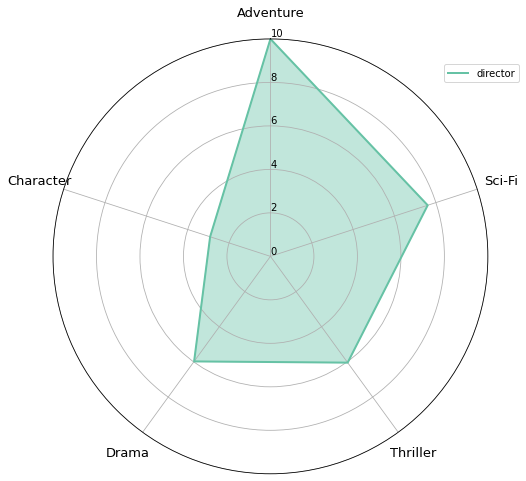

In [ ]:
circle_stat(director_result) 
## 추가요소 
# 1. 글씨키우기
# 2. 히스토그램 평점 평가한 수
# 3. 워드클라우드 추가요소 

## 웹파트 문제점
# 1. recommend movie

In [ ]:
#plt.savefig('C:/ESWork/ESPython/final_project/data/img/aaaa.png')